# **NETFLIX DATA ANALYSIS**

In [1]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
data=pd.read_csv('https://raw.githubusercontent.com/TheiScale/YouTube-Video-Notes/e7681847b5bd8499ef57ca5b1618543835157a25/New%20Netflix%20Data%20Analysis%20Project%202025/mymoviedb.csv',lineterminator='\n')


**Exploring the data**

In [3]:
data.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
data.size

88443

In [5]:
data.shape

(9827, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [7]:
data.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [8]:
#checking for null values manually to confirm information from data.info
data.isnull().sum()

,0
Release_Date,0
Title,0
Overview,0
Popularity,0
Vote_Count,0
Vote_Average,0
Original_Language,0
Genre,0
Poster_Url,0


In [9]:
#checking for duplicate values
data.duplicated().sum()

0

**After having gathered basic information of the data we start working towards answering the questions asked.**

In [10]:
#converting release date to date-time format
data.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [11]:
data['Release_Date']=pd.to_datetime(data['Release_Date'])

In [12]:
#checking if conversion was successfully implemented
print(data['Release_Date'].dtypes)

datetime64[ns]


In [13]:
#keeping only years part of the column as per requirements and dropping the rest
data['Release_Date']=data['Release_Date'].dt.year

In [14]:
#checking if changes were successfully implemented
data['Release_Date'].dtypes

dtype('int32')

In [15]:
data.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [16]:
#dropping the unnecessary columns
drop_list=['Overview','Original_Language','Poster_Url']
data.drop(drop_list,axis=1,inplace=True)

In [17]:
data.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

**We will categorize the Vote_Average column in 4 categories -> Popular, Average, Below Average and Not Popular**

In [18]:
#defining a function for categorization
def categorize_col(df,col,label):
  edges=[df[col].describe()['min'],
         df[col].describe()['25%'],
         df[col].describe()['50%'],
         df[col].describe()['75%'],
         df[col].describe()['max']]
  df[col]=pd.cut(df[col],edges,labels=label,duplicates='drop')
  return df

In [19]:
labels=['not_popular','below_average','average','popular']
categorize_col(data,'Vote_Average',labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,not_popular,Horror
9824,2016,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


In [20]:
data['Vote_Average'].value_counts()

,count
Vote_Average,
not_popular,2467
popular,2450
average,2412
below_average,2398


In [21]:
data.dropna(inplace=True)
data.isnull().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


**Splitting the movie genres so that there is only one genre per row**

In [22]:
data['Genre']=data['Genre'].str.split(', ')

data=data.explode('Genre').reset_index(drop=True)
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [23]:
data['Genre']=data['Genre'].astype('category')
data['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [24]:
data.nunique()

,0
Release_Date,100
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,4
Genre,19


**Now we will move on to data visualization and answer the questions one by one as we have prepared our data**

In [25]:
sns.set_style('whitegrid')

**Q1.What is the most frequent genre of movies released on Netflix?**

In [26]:
data['Genre'].describe()

,Genre
count,25552
unique,19
top,Drama
freq,3715


From here we can see that **drama** is the top genre.Now we will visualize this.

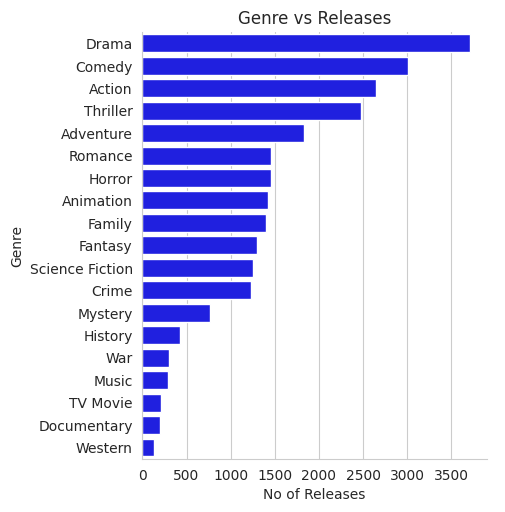

In [27]:
sns.catplot(y='Genre',data=data,kind='count',order=data['Genre'].value_counts().index,color='b')
plt.title('Genre vs Releases')
plt.xlabel('No of Releases')
plt.ylabel('Genre')
plt.show()

**Q2. Which genres have highest votes?**

In [28]:
# Group data by genre and sum vote counts
genre_vote_counts = data.groupby('Genre')['Vote_Count'].sum().reset_index()

# Sort genres by vote counts in descending order
genre_vote_counts = genre_vote_counts.sort_values(by=['Vote_Count'], ascending=False)

<ipython-input-28-0ee8d79d8e74>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_vote_counts = data.groupby('Genre')['Vote_Count'].sum().reset_index()


<ipython-input-29-f46b4a9cfa2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vote_Count', y='Genre', data=genre_vote_counts,order=genre_vote_counts['Genre'] ,palette='viridis')


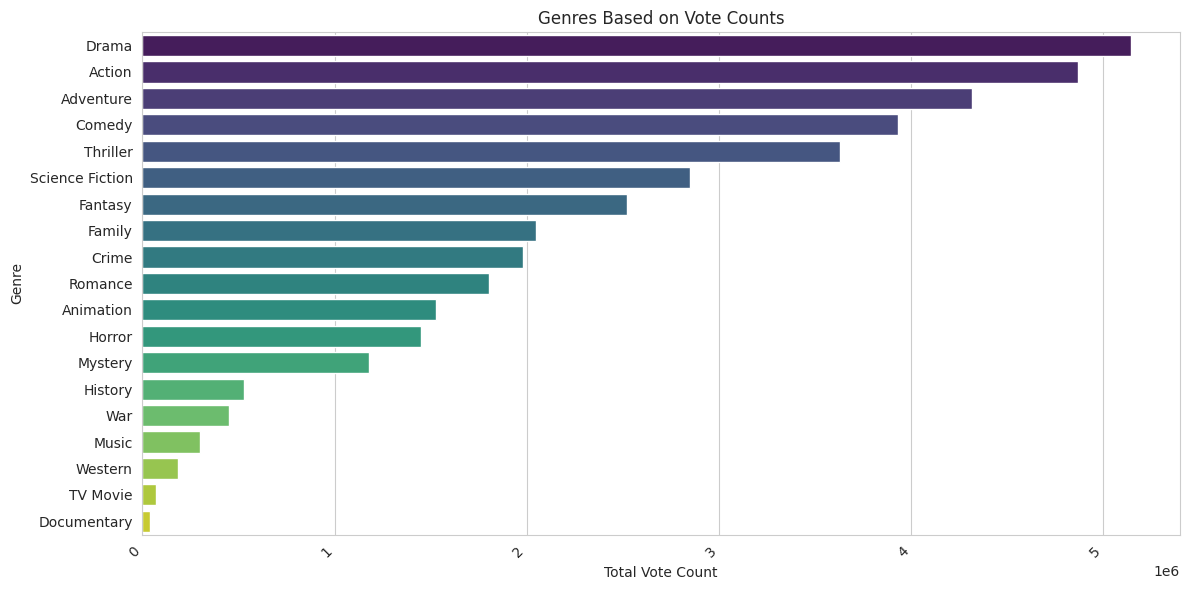

In [29]:
#create a barplot to visualize the data
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='Vote_Count', y='Genre', data=genre_vote_counts,order=genre_vote_counts['Genre'] ,palette='viridis')
plt.title('Genres Based on Vote Counts')
plt.xlabel('Total Vote Count')
plt.ylabel('Genre')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

As we can see, **drama** has the highest vote counts.

**Q3. Which movie is the most popular and what’s it’s genre?**

In [30]:
data[data['Popularity']==data['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


Hence, the most popular movie is **Spider-Man: No Way Home** and it's genres are **Action, Adventure and Science Fiction**.

**Q4. Which movie got the lowest popularity and what’s it’s genre?**

In [31]:
data[data['Popularity']==data['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


The least popular movie is **The United States vs. Billie Holiday** and it's genres are **Music, Drama and History**.

**Q5.	Which year got the highest number of movies filmed?**

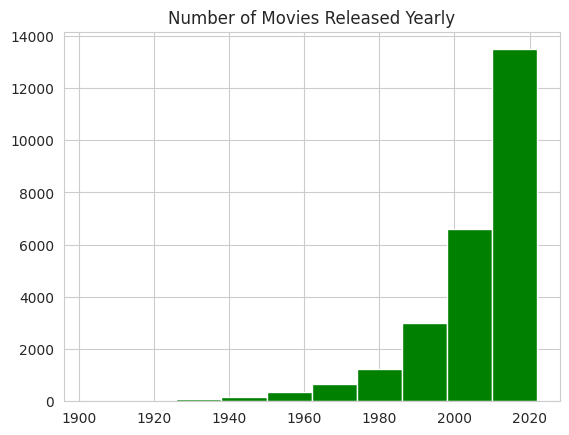

In [32]:
data['Release_Date'].hist(color='green')
plt.title('Number of Movies Released Yearly')
plt.show()

The year **2020** got the most number of releases

# **Summary Findings**



*   **Drama genre has the highest number of releases on Netflix.**
*   **Drama genre has the highest number of votes**
*   **The most popular movie is Spider-Man: No Way Home and it's genres are Action, Adventure and Science Fiction.**
*   **The least popular movie is The United States vs. Billie Holiday and it's genres are Music, Drama and History.**
*   **The year 2020 got the most number of releases**






